In [1]:
import pandas as pd
import ast
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
zero = np.zeros((100,10))

In [3]:
# df = pd.read_csv('csv_results/result_16.csv')
# df_ar = pd.read_csv('csv_results_mercury/result_ar.csv')
# df_arma = pd.read_csv('csv_results_mercury/result_arma.csv')
df = pd.read_csv('csv_results/result_31.csv')

# df_ar = pd.read_csv('csv_results_mercury/result_ar.csv').sort_values(by='seed').head(33)
# df_arma = pd.read_csv('csv_results_mercury/result_arma.csv').sort_values(by='seed').head(33)
# df = pd.read_csv('csv_results/result_18.csv').sort_values(by='seed').head(33)

# df_ar = pd.read_csv('csv_results_mercury/result_ar.csv').sort_values(by='seed').tail(33)
# df_arma = pd.read_csv('csv_results_mercury/result_arma.csv').sort_values(by='seed').tail(33)
# df = pd.read_csv('csv_results/result_1.csv').sort_values(by='seed').tail(33)
df

,seed,arma_Test,arma_True,arma_ARMA,arma_AR,arma_Informer,arma_Informer_para,arma_Informer_lr,arma_RNN,FAR_Test,...,STAR_Informer_lr,STAR_RNN,non-non_X_Test,non-non_X_True,non-non_X_ARMA,non-non_X_AR,non-non_X_Informer,non-non_X_Informer_para,non-non_X_Informer_lr,non-non_X_RNN
0,9,"[1.3720358408819346, 0.1934169010522101, 0.275...","[0.636904104623728, 1.0535837885700707, -0.333...","[0.603661192746527, 1.065989013411405, -0.3811...","[0.6819054921350081, 1.03770334510464, -0.3332...","[0.8347122, 1.0334237, -0.19879133, 0.28950953...","(10, 2)",0.0001,"[0.6603814363479614, 0.9828792810440063, -0.02...","[-1.8415811206218933, 0.5922450457273336, 0.32...",...,0.0001,"[0.17184056341648102, -0.4262194335460663, -0....","[0.4630727650093131, 1.257922961119379, 0.8723...","[-0.06273349493126312, 0.2853220443441925, 0.0...","[-0.18636965597328864, -0.1185554129691613, 0....","[-0.23043977556990683, -0.1140924376297066, 0....","[-0.19689861, -0.008558661, -0.15195042, -0.05...","(10, 2)",0.0001,"[-0.007449932396411896, -0.10592062026262283, ..."
1,6,"[-0.4453356817584949, -0.8090818530260567, -0....","[0.0020627459518735014, -0.44636705473443167, ...","[-0.0035691338230353087, -0.44419745582429715,...","[-0.0032654801847282755, -0.4266235107710733, ...","[-0.13273257, -0.51794565, -0.8487104, -0.1781...","(10, 2)",0.0001,"[0.023276209831237793, -0.3753323256969452, -0...","[0.2816253413466242, -0.04814569789076484, -1....",...,0.0001,"[0.7411775588989258, 1.1866111755371094, -0.41...","[-0.38261346218354486, 0.5614811635084341, -1....","[0.9853044755386005, -0.5930446003653772, 0.01...","[-0.13696599486470945, -0.26088370712149594, -...","[-0.09641901938287435, -0.2446351009615557, -0...","[0.098579824, 0.0006507486, -0.12690535, -0.99...","(10, 2)",0.0001,"[-0.006753817200660706, -0.13036952912807465, ..."
2,3,"[0.7980877186989277, 1.2468067813411086, 1.240...","[0.7727444411989659, 0.41171549809944474, 1.04...","[0.764220586097548, 0.44963419353551115, 1.041...","[0.7776230132762922, 0.4764294355458374, 0.979...","[0.68617857, 0.5406156, 0.95513386, 0.8949686,...","(10, 2)",0.0001,"[0.8679314255714417, 0.5596821308135986, 1.105...","[-1.5986346778189857, -1.5878727112076145, -0....",...,0.0001,"[0.4955216348171234, 1.0300910472869873, 1.283...","[-0.24182805468071536, 1.0563651129923464, 0.1...","[-0.5004117619383223, 0.2814716361787024, -0.0...","[-0.09283430291217573, -0.27092888630515566, 0...","[-0.09658687034000507, -0.2866759090831097, 0....","[0.1318483, -0.18730623, 0.1496962, -0.1184372...","(50, 10)",0.0001,"[0.031320035457611084, -0.1986730843782425, 0...."
3,7,"[-0.8232601166334932, -0.5298394014472506, -0....","[-0.7770452226186639, -0.4347375053241612, -0....","[-0.7238853974917612, -0.34970377158819516, -0...","[-0.7238853974917612, -0.34970377158819516, -0...","[-0.7179561, -0.5300355, -0.20048793, -0.04871...","(10, 2)",0.0001,"[-0.651237428188324, -0.48222577571868896, -0....","[0.31344328633561974, 1.640764181358371, 1.614...",...,0.0001,"[-0.016769222915172577, -0.3300591707229614, -...","[-0.3369908350305853, -0.7095425702991032, 1.2...","[0.1942372358597056, -0.002037481912072703, -0...","[-0.2682188565702581, -0.23475841546138249, -0...","[-0.31425249834392815, -0.24186212745456936, -...","[-0.38600573, 0.0020485818, -0.1840275, -0.048...","(50, 10)",0.0001,"[-0.11367952823638916, 0.19401517510414124, -0..."
4,2,"[-0.07619475748646493, 0.09164797186979468, 0....","[-0.8616532555087413, 0.35463187026790566, -0....","[-0.8471793149811205, 0.38402214373196086, -0....","[-0.8471793149811205, 0.38402214373196086, -0....","[-0.79547065, 0.12312735, 0.24252796, 0.056679...","(20, 4)",0.0001,"[-0.9109973311424255, 0.41309604048728943, 0.0...","[-0.751607391576511, 0.782296145991407, 1.6342...",...,0.0001,"[0.34314197301864624, -0.29970455169677734, -0...","[-2.3650420028600014, -3.032951217811844, -2.5...","[-1.1577293699144882, -0.24123917788216287, -1...","[-0.508069339615493, -0.6354171750821085, -0.7...","[-0.49

In [19]:
DGP_lst = ["arma", "FAR", "bilinear", "lin-non1", "STAR", "non-non_X"]
model_lst = ["ARMA", "AR", "Informer", "RNN"]
plot_lst = ["zero", "ARMA", "AR", "Informer", "RNN"]
function_dict = {
    "arma": "X_t = 0.5 * X[t - 1] + U[t] + 0.5 * U[t - 1]",
    "FAR": "X[t] = exp(-X[t-1]**2) * X[t-1] + exp(-X[t-1]**2) * X[t-2] + U[t] + 0.5 * U[t-1] + 0.2 * U[t-2]",
    "bilinear":"X[t] = 0.5 * X[t-1] + U[t] + 0.5 * U[t-1] + 0.5 * X[t-1] * U[t-1]",
    "lin-non1":"X[t] = 0.5 * X[t-1] + U[t] + 0.5 * U[t-1]**2",
    "STAR":"G[t] = 1 / (1 + exp(-20 * (X[t-1] - 1)))\n" \
           "X[t] = 0.1 * X[t-1] + 0.5 * X[t-1] * G[t] + U[t] + 0.5 * U[t-1]",
    "non-non_X":"-0.2 * abs(Y[t-1]) "
    "+ U[t] "
    "+ (-0.2) * U[t-1] * I(U[t-1] <= 0)\n "
    "+ 0.8 * U[t-1] * I(U[t-1] > 0) "
    "+ sum(β[i] * X[i, t-1] for i in range(1, 8))"
}

In [15]:
function_dict

{'arma': 'X_t = 0.5 * X[t - 1] + U[t] + 0.5 * U[t - 1]',
 'FAR': 'X[t] = exp(-X[t-1]**2) * X[t-1] + exp(-X[t-1]**2) * X[t-2] + U[t] + 0.5 * U[t-1] + 0.2 * U[t-2]',
 'bilinear': 'X[t] = 0.5 * X[t-1] + U[t] + 0.5 * U[t-1] + 0.5 * X[t-1] * U[t-1]',
 'lin-non1': 'X[t] = 0.5 * X[t-1] + U[t] + 0.5 * U[t-1]**2',
 'STAR': 'G[t] = 1 / (1 + exp(-20 * (X[t-1] - 1)))\nX[t] = 0.1 * X[t-1] + 0.5 * X[t-1] * G[t] + U[t] + 0.5 * U[t-1]',
 'non-non_X': '-0.2 * abs(Y[t-1]) + U[t] + (-0.2) * U[t-1] * I(U[t-1] <= 0) + 0.8 * U[t-1] * I(U[t-1] > 0) + sum(β[i] * X[i, t-1] for i in range(1, 8))'}

In [5]:
def getModelMSETrue(DGP_name, output):
    result = {}
    EX = np.array(output[f"{DGP_name}_True"].apply(ast.literal_eval).to_list())
    for model in model_lst:
        result[model] = mean_squared_error(
            EX,
            np.array(output[f"{DGP_name}_{model}"].apply(ast.literal_eval).to_list()),
            multioutput="raw_values",
        )
    result["zero"] = mean_squared_error(EX,zero,multioutput='raw_values')
    return result

In [6]:
def getDGPMSETrue(output):
    result = {}
    for DGP in DGP_lst:
        result[DGP] =  getModelMSETrue(DGP,output)
    return result

In [8]:
data = getDGPMSETrue(df)

In [ ]:
# informer_select = np.array(df['Informer_para'].apply(ast.literal_eval).to_list())[:,0]
# informer_lr_select = np.array(df['Informer_lr'].to_list())
# informer_select

array([10, 50, 50, 10, 10, 50, 50, 10, 10, 50, 10, 10, 10, 20, 10, 50, 50,
       20, 10, 20, 50, 20, 10, 10, 10, 20, 20, 10, 10, 20, 20, 10, 20, 10,
       20, 20, 20, 10, 10, 10, 20, 50, 20, 50, 10, 50, 20, 50, 50, 50, 10,
       10, 50, 10, 10, 10, 10, 20, 20, 50, 20, 10, 20, 50, 50, 50, 50, 10,
       20, 20, 20, 10, 10, 50, 10, 20, 20, 10, 50, 50, 50, 20, 20, 20, 10,
       20, 20, 50, 50, 50, 10, 10, 20, 20, 10, 20, 20, 20, 10, 50])

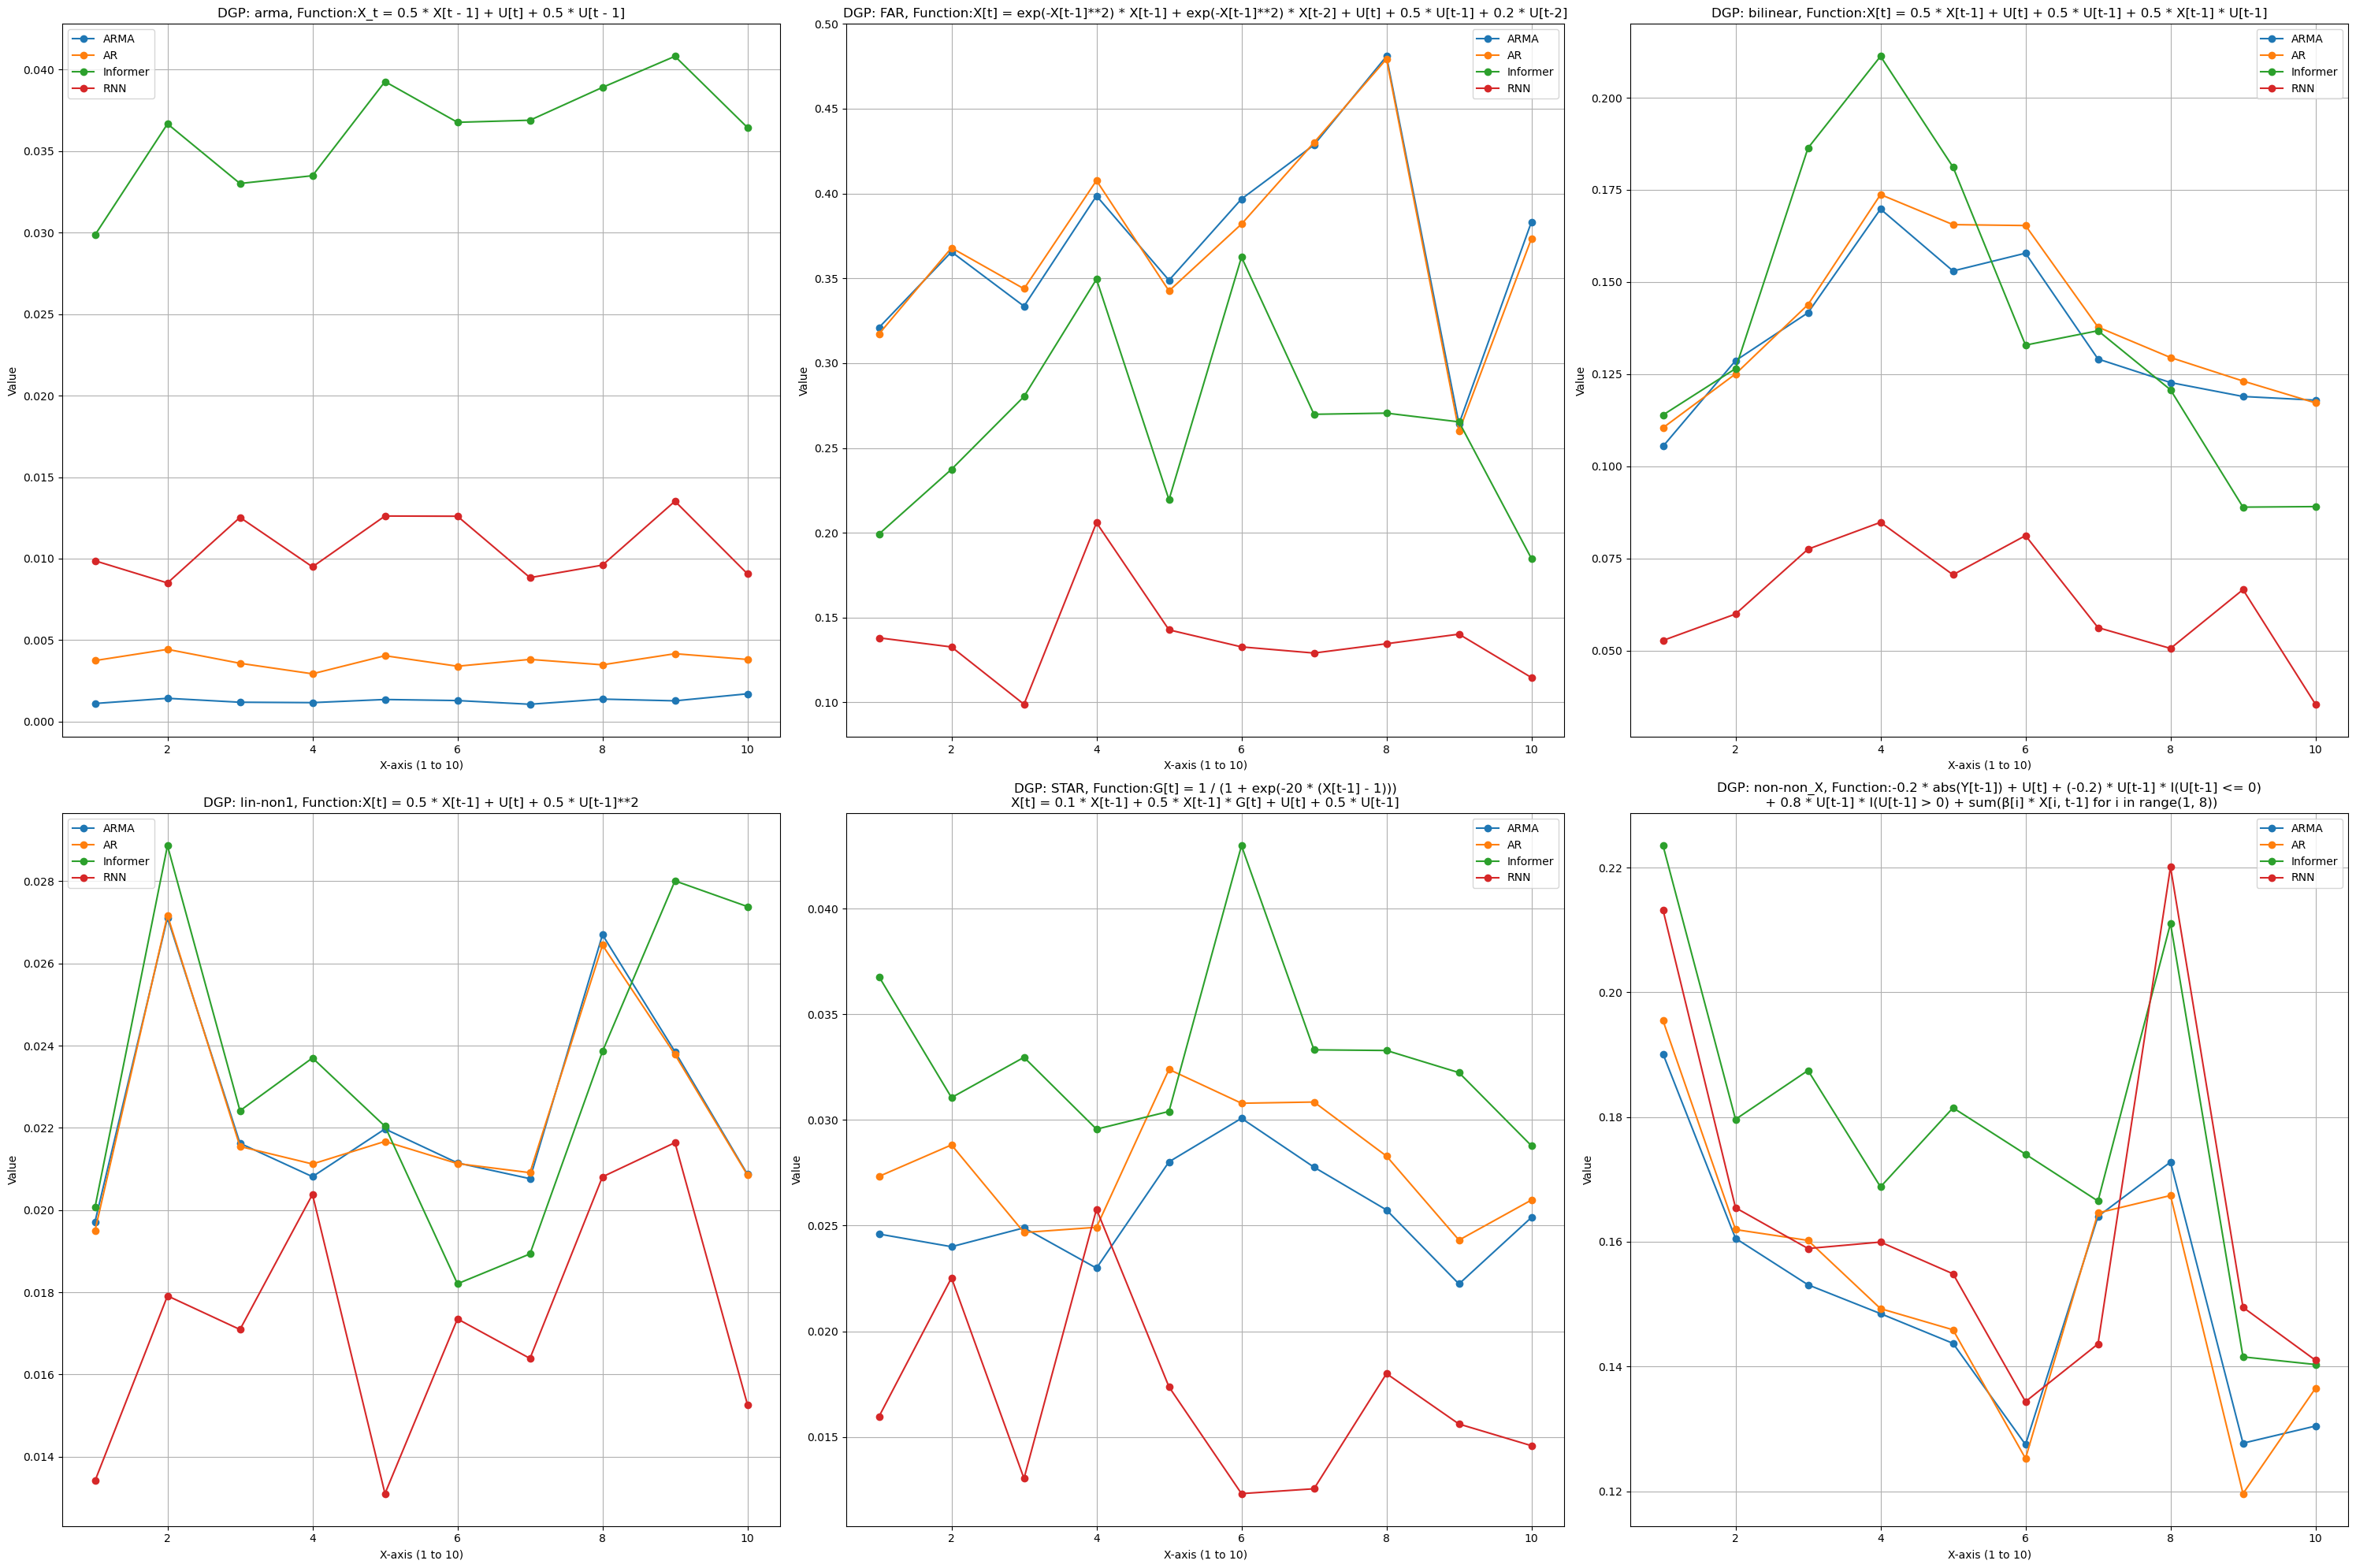

In [21]:
plt.figure(figsize=(30, 20))  # Adjust size for better readability
for i, dgp in enumerate(DGP_lst, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns
    for model in model_lst:
        plt.plot(range(1, 11), data[dgp][model], label=model, marker='o')
    
    plt.title(f"DGP: {dgp}, Function:{function_dict[dgp]}")
    plt.xlabel("X-axis (1 to 10)")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

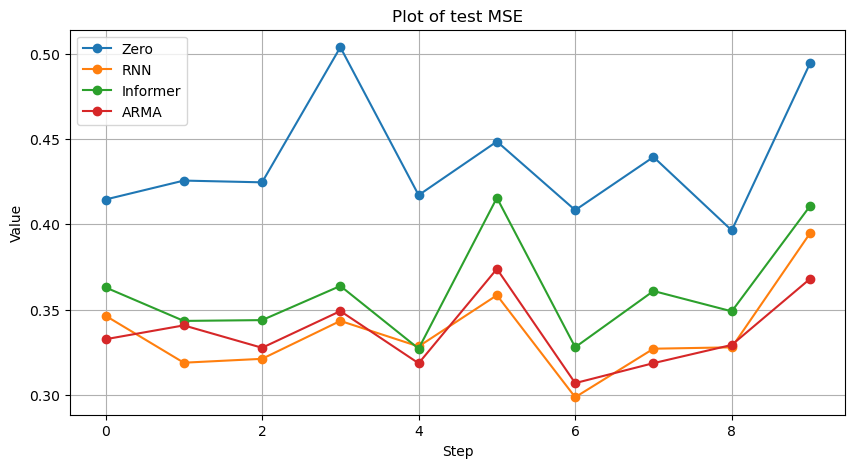

In [9]:


# Plotting the array
plt.figure(figsize=(10, 5))
plt.plot(zero_mse,label = 'Zero', marker='o')
plt.plot(rnn_mse,label = 'RNN', marker='o')  # Using 'o' as a marker for each data point
plt.plot(informer_mse,label = 'Informer', marker='o')  # Using 'o' as a marker for each data point
plt.plot(arma_mse,label = 'ARMA', marker='o')  # Using 'o' as a marker for each data point
# plt.plot(ar_mse,label = 'AR', marker='o')  # Using 'o' as a marker for each data point
plt.title('Plot of test MSE')
plt.xlabel('Step')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()


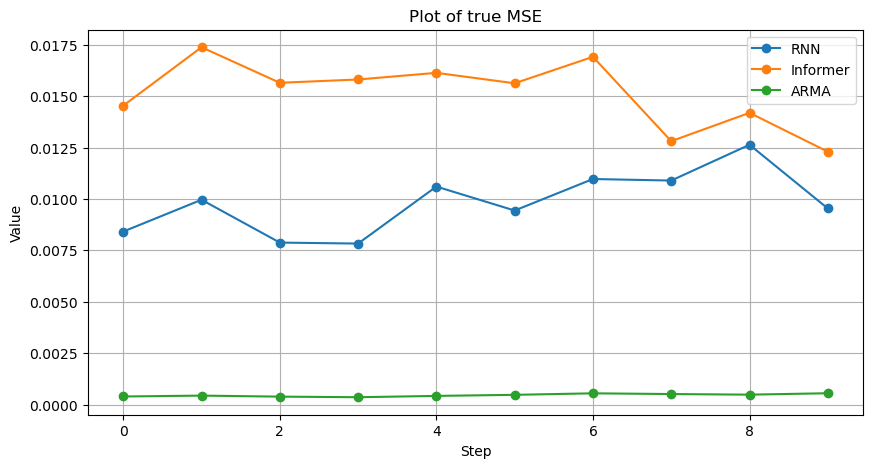

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the array
plt.figure(figsize=(10, 5))
# plt.plot(zero_mse_true,label = 'Zero', marker='o')
plt.plot(rnn_mse_true,label = 'RNN', marker='o')  # Using 'o' as a marker for each data point
plt.plot(informer_mse_true,label = 'Informer', marker='o')  # Using 'o' as a marker for each data point
plt.plot(arma_mse_true,label = 'ARMA', marker='o')  # Using 'o' as a marker for each data point
# plt.plot(ar_mse_true,label = 'AR', marker='o')  # Using 'o' as a marker for each data point
plt.title('Plot of true MSE')
plt.xlabel('Step')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()


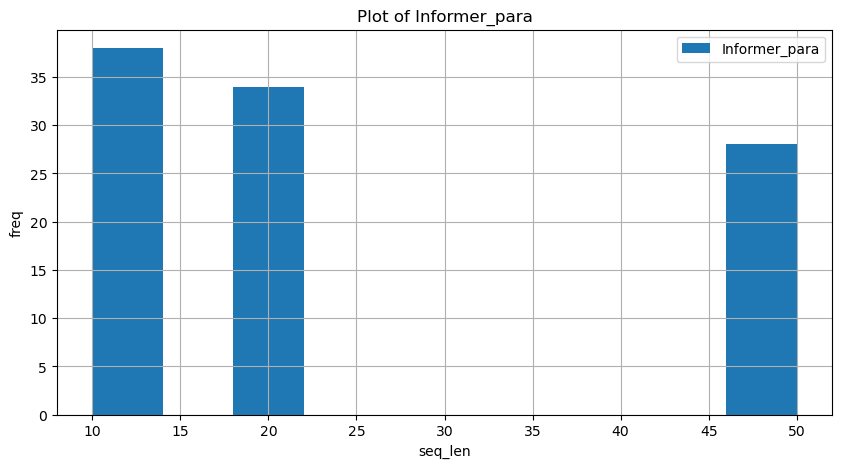

In [11]:

# Plotting the array
plt.figure(figsize=(10, 5))
plt.hist(informer_select,label = 'Informer_para')  # Using 'o' as a marker for each data point
plt.title('Plot of Informer_para')
plt.xlabel('seq_len')
plt.ylabel('freq')
plt.grid(True)
plt.legend()
plt.show()

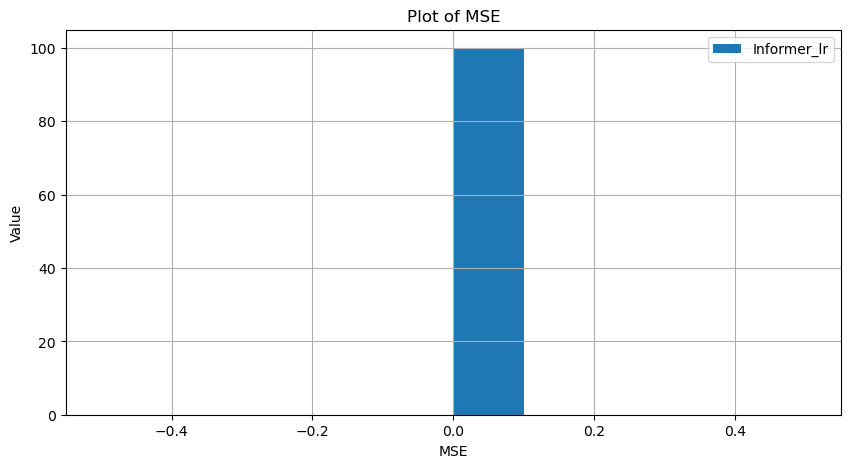

In [12]:
plt.figure(figsize=(10, 5))
plt.hist(informer_lr_select,label = 'Informer_lr')  # Using 'o' as a marker for each data point
plt.title('Plot of MSE')
plt.xlabel('MSE')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()